In [1]:
from snownlp import SnowNLP 
from snownlp import sentiment 
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
#导⼊样例数据，读取⽂本数据 
df = pd.read_excel('JDComments.xlsx')[['评论内容']]
#查看数据情况
df.describe()

,评论内容
count,1000
unique,1000
top,外形外观：颜值超高\n屏幕音效：清脆的苹果专属音效\n拍照效果：还没试用\n运行速度：一如既...
freq,1


In [3]:
#查看默认评价
df[df['评论内容']=="此用户未填写评价内容"]

,评论内容


In [4]:
#删除默认评价
df.drop(df[df['评论内容']=="此用户未填写评价内容"].index,inplace = True)
print(len(df[df['评论内容']!=""])) #统计有效评论数

1000


In [5]:
#导入数据
data = df['评论内容']

In [6]:
values=[SnowNLP(i).sentiments for i in data]
#输出积极的概率，⼤于0.5积极的，⼩于0.5消极的
#myval保存预测值 
myval=[] 
good=0 
bad=0 
for i in values: 
    if (i>=0.5): 
        myval.append("正⾯") 
        good=good+1 
    else:
        myval.append("负⾯")
        bad=bad+1

In [7]:
df['预测值']=values
df['评价类别']=myval

In [8]:
#查看分析情况
df.head()

,评论内容,预测值,评价类别
0,外形外观：直角边框经典设计，手感非常好。不锈钢边框很有质感\n屏幕音效：iPhone屏幕一如...,1.000000,正⾯
1,外形外观：用了一个多月再来评价，手机到手完美，没有网上说的那些问题\n屏幕音效：顶级屏幕显示...,1.000000,正⾯
2,13香，13pro max真香。\n外形外观：霸气外露\n屏幕音效：这个音响效果很好(喜欢音...,1.000000,正⾯
3,外形外观：和12pro max的外观差不多\n屏幕音效：120赫兹的高刷屏很不错，确实比较快...,0.996948,正⾯
4,外形外观：非常漂亮！比11款漂亮多了，就喜欢这种反正\n屏幕音效：很不错\n拍照效果：太清晰...,1.000000,正⾯


In [9]:
#将结果输出到Excel 
df.to_excel('result.xlsx')
rate=good/(good+bad) 
print('好评率','%.f%%' % (rate * 100)) #格式化为百分⽐

好评率 96%


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

/Users/sensmd/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sensmd/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12132 missing from current font.
  font.set_text(s, 0, flags=flags)


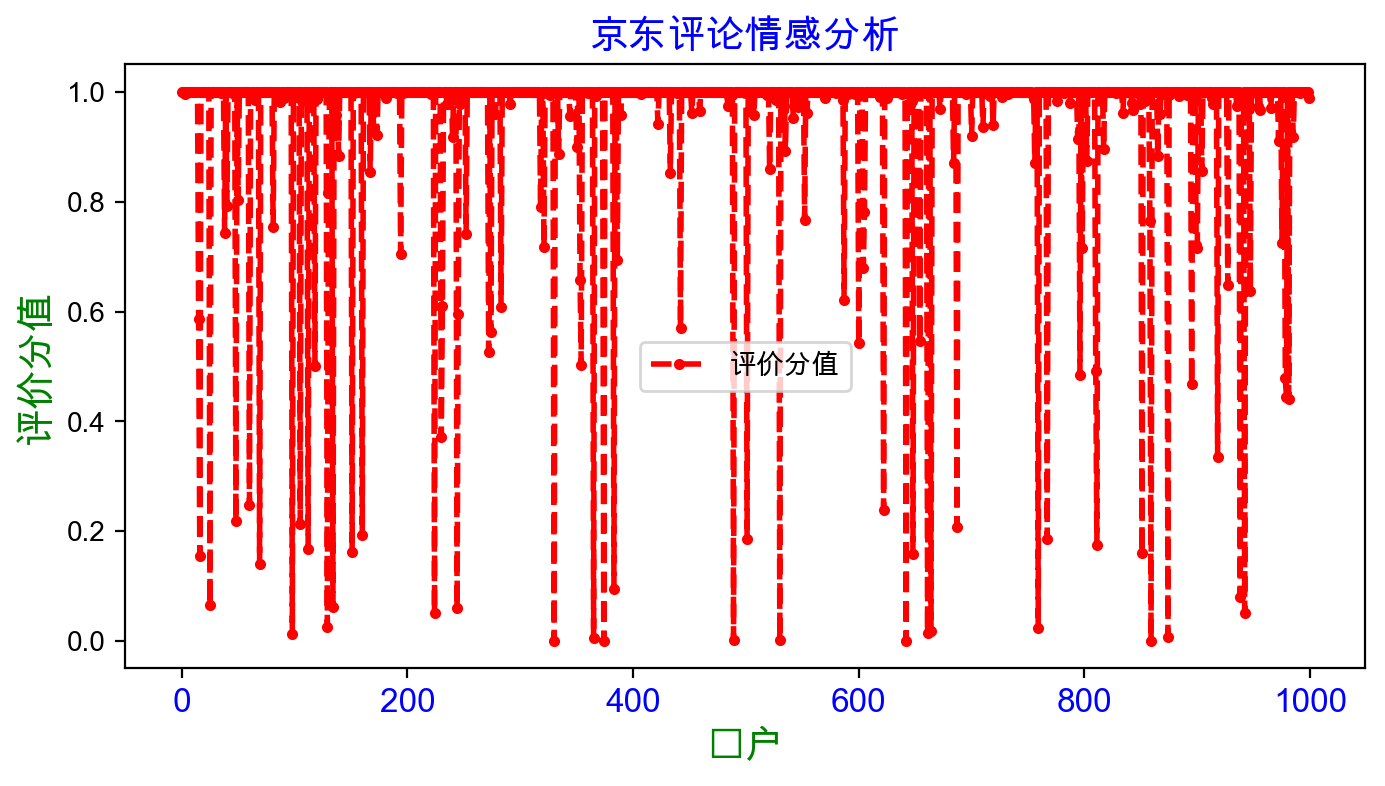

In [10]:
y=values
plt.figure(figsize=(8,4),dpi=200)
plt.plot(y,'r--.',linewidth=2,label='评价分值') 
plt.xlabel('⽤户',color='g',fontsize=14)
plt.ylabel('评价分值',color='g',fontsize=14)  
#添加标题 
plt.title('京东评论情感分析',fontsize=14,color='b') 
#让图例⽣效
plt.legend()
plt.xticks(color='b',fontsize=12)